# Question 18

Write a program to implement image scaling operation in horizontal direction by an amount `14.2` and vertical direction by an amount `1.6`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage.transform import rescale

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'f256',
    'l256',
    'o256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of dictionaries for the filename, original image, converted image/s
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append({
        'filename': filename,
        'orig': image,
        'equalized': None
    })

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



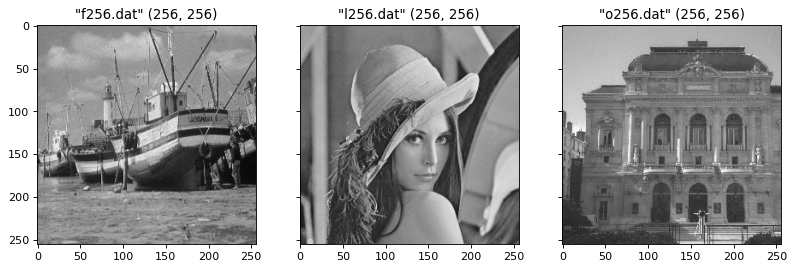

In [4]:
# Matrix dimensions
cols = 3
rows = 1

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    image = image_dict['orig']

    # Set subplot title as '"filename" (rows, cols)' 
    axs[idx].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[idx].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Scale Images

In [5]:
def scale_image(image, scale_x: int, scale_y: int):
    return rescale(image, (scale_y, scale_x)) * 255

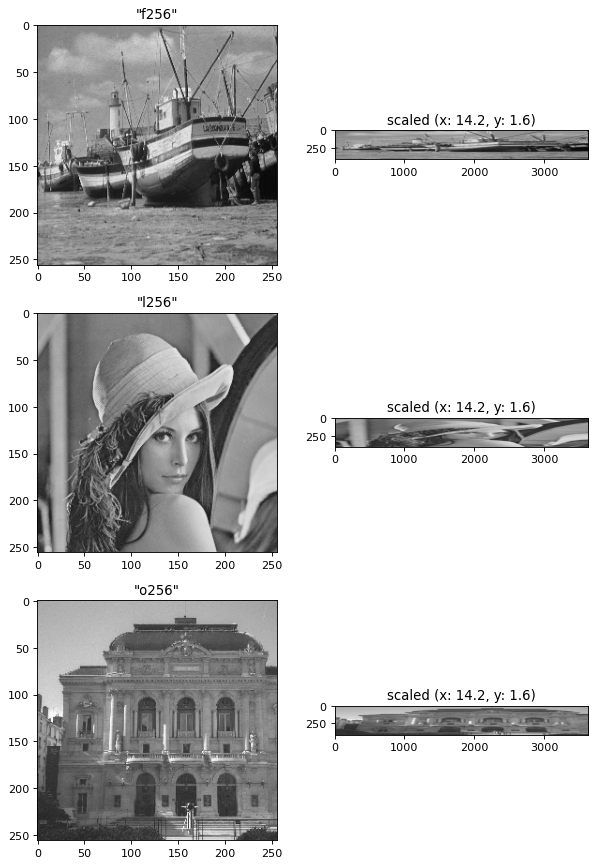

In [6]:
rows, cols = len(images), 2

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80)
fig.set_size_inches(4.5 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']

    SCALE_X, SCALE_Y = 14.2, 1.6
    orig = image_dict['orig']
    scaled = scale_image(orig, SCALE_X, SCALE_Y)

    axs[idx, 0].set_title('"{}"'.format(filename))
    axs[idx, 0].imshow(orig, cmap='gray', vmin=0, vmax=255)
    
    axs[idx, 1].set_title(f'scaled (x: {SCALE_X}, y: {SCALE_Y})'.format(filename))
    axs[idx, 1].imshow(scaled, cmap='gray', vmin=0, vmax=255)

    # Save pixel values of original image's histogram as a 2D matrix in a .dat file
    np.savetxt(
        path_out_conv + ext_inp[1:] + '/' + filename + '_scaled' + ext_inp,
        scaled,
        fmt=' %d',
        newline=' \n'
    )

    # Save noisy image as .bmp file
    plt.imsave(
        path_out_conv + ext_out[1:] + '/' + filename + '_scaled' + ext_out,
        scaled,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Save and display the figure
plt.savefig('scale_image.jpg')
plt.show()

## Resource

**GitHub repository: ** [`Image Processing and Pattern Recognition`](https://github.com/meganindya/btech-assignments/tree/main/image-processing-pattern-recognition) - [`Anindya Kundu (meganindya)`](https://github.com/meganindya)